In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Matplotlib is building the font cache; this may take a moment.


In [4]:
dataset = pd.read_csv('weatherHistory.csv')

In [5]:
dataset.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [6]:
dataset.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [7]:
x = dataset.drop(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)', 'Daily Summary'], axis=1)

In [8]:
y = dataset['Temperature (C)']

In [9]:
x2 = sm.add_constant(x)
review = sm.OLS(y, x2).fit()
review.summary()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.612e+06
Date:                Thu, 01 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:50:15   Log-Likelihood:            -1.3181e+05
No. Observations:               96453   AIC:                         2.636e+05
Df Residuals:                   96446   BIC:                         2.637e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.8408      0.035     81.988      0.000       2.773       2.909
Apparent Temperature (C)     0.8725      0.000   2295.962      0.000       0.872       0.873
Humidity                    -1.4240      0.021    -67.763      0.000      -1.465      -1.383
Wind Speed (km/h)            0.0798      0.000    168.462      0.000       0.079       0.081
Wind Bearing (degrees)      -0.0004   2.87e-05    -14.110      0.000      -0.000      -0.000
Visibility (km)              0.0084      0.001     10.357      0.000       0.007       0.010
Loud Cover                        0          0        nan        nan           0           0
Pressure (millibars)        -0.0002   2.62e-05     -7.793      0.000      -0.000      -0.000
==============================================================================
Omnibus:                     3699.742   Durbin-Watson:                   0.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4456.312
Skew:                          -0.445   Prob(JB):                         0.00
Kurtosis:                       3.563   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [10]:
x = x.drop(['Humidity','Wind Bearing (degrees)'], axis=1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [12]:
ml.coef_

array([ 8.86885623e-01,  8.87772572e-02,  1.67652841e-02,  0.00000000e+00,
       -2.30986452e-04])

In [13]:
ml.intercept_

1.4049210270770978

In [14]:
ml.score(x_test, y_test)

0.9895558275765767

In [15]:
predicted = ml.predict(x_test)
predicted

array([14.54297635, 13.56504819, 23.2610142 , ...,  0.79684822,
        8.12812742, 16.36265402])

Text(0.5, 1.0, 'Test vs Predicted')

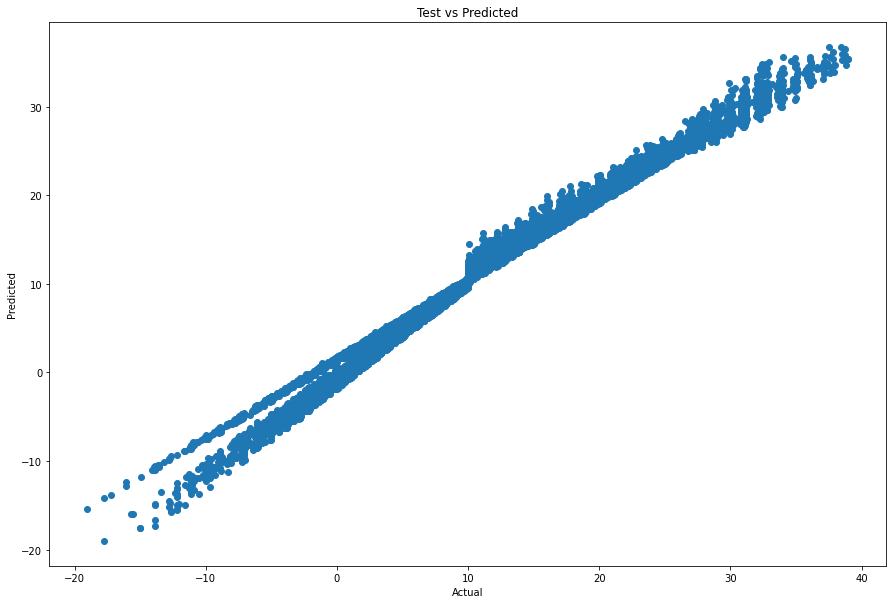

In [16]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test vs Predicted')